<a href="https://colab.research.google.com/github/alfa7g7/Analisis-Cuantitativo-1er-semestre/blob/main/examen-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FACULTAD DE INGENIERÍA, DISEÑO Y CIENCIAS
APLICADAS
MAESTRÍA EN CIENCIA DE DATOS
TIC 60153 – Análisis Cuantitativo
Examen 1 (50 %): Modelo de Regresión Lineal


In [85]:
# Declaracion de librerias a usar

# Importacion de pandas y asignandole el alias pd, se usa para proceso de datos como dataframes entre otros.
import pandas as pd
# Importacion de seaborn y asignándole el alias sns, se usa para analisis grafico
import seaborn as sns
# Importacion de matplotlib.pyplot y asignándole el alias plt, se usa analisis grafico
import matplotlib.pyplot as plt
# Libreria para hacer modelacion lineal
import statsmodels.api as sm
# Importacion de numpy y asignandole el alias np, se usa para calculos matriciales
import numpy as np
# Importacion de ttest_1samp desde la libreria scipy.stats, se usa para calculos del modelo OLS
from scipy.stats import ttest_1samp
# Importacion de lzip desde la libreria statsmodels.compat, se usa para calculos de homocedasticidad del modelo OLS
from statsmodels.compat import lzip
# Importacion de statsmodels.stats.api y asignandole el alias sms
import statsmodels.stats.api as sms

### 1) Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.
Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto (εiiid∼ N(0, σ2)).

In [2]:
# Empezamos por leer el conjunto de datos "data1" del fichero data_exam1.xlsx
df = pd.read_excel("data_exam1.xlsx", sheet_name = 'data1')
df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
...,...,...,...
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0


In [3]:
# Observamos la configuración de las variables de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
# Observamos los primero 5 datos (filas) del dataframe df
df.head()

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0


In [5]:
# Observamos los ultimos 5 datos (filas) del dataframe df
df.tail()

,Y,X,Ind
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0
999,65.442984,12.692550,0


In [6]:
# Observamos los nombres de las columnas o headers del dataframe df
df.columns

Index(['Y', 'X', 'Ind'], dtype='object')

In [7]:
# Observamos la descripcon analitica de los datos tabulares
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


In [8]:
# Observando si hay algún dato nulo x2da vez
df.isnull().any()

Y      False
X      False
Ind    False
dtype: bool

In [14]:
# Determinamos el valor de correlaciones entre las variables
df.corr()

,Y,X,Ind
Y,1.000000,0.832057,-0.237224
X,0.832057,1.000000,0.024069
Ind,-0.237224,0.024069,1.000000


array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>,
        <Axes: xlabel='Ind', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X'>, <Axes: xlabel='X', ylabel='X'>,
        <Axes: xlabel='Ind', ylabel='X'>],
       [<Axes: xlabel='Y', ylabel='Ind'>,
        <Axes: xlabel='X', ylabel='Ind'>,
        <Axes: xlabel='Ind', ylabel='Ind'>]], dtype=object)

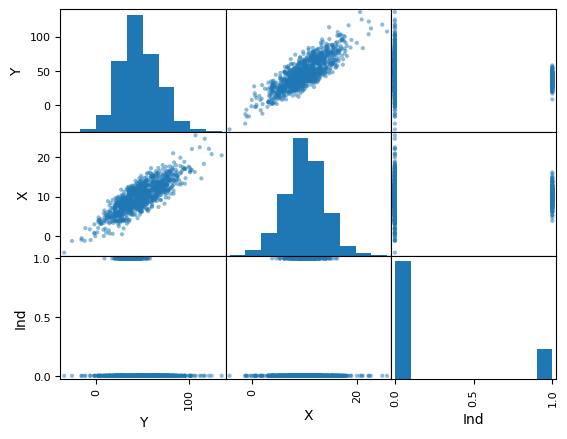

In [62]:
# Analizamos el histograma y dispersión para cada una de las variables del dataframe 'df'
pd.plotting.scatter_matrix(df)

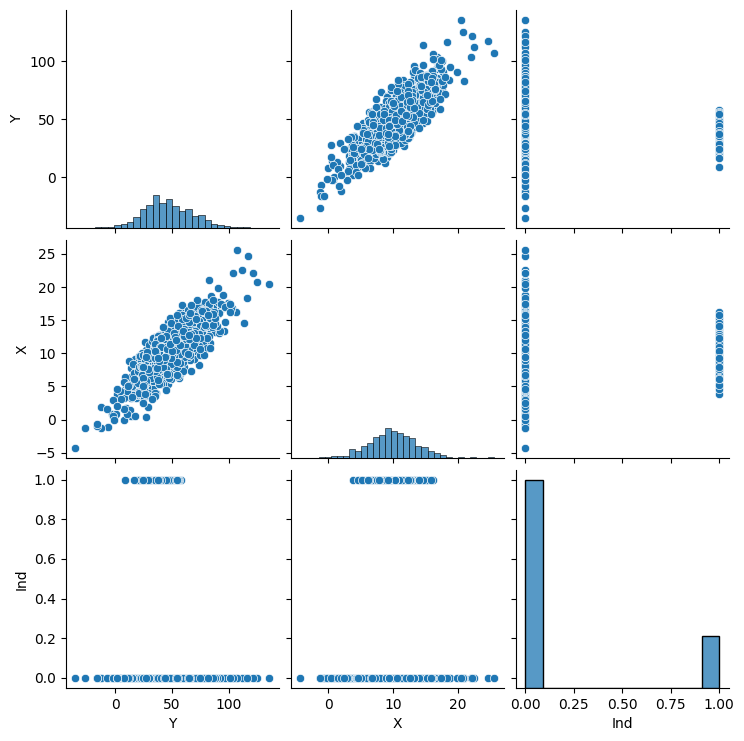

In [10]:
# Es una gráfica igual a la interior con una mejor expresión visual
sns.pairplot(df)

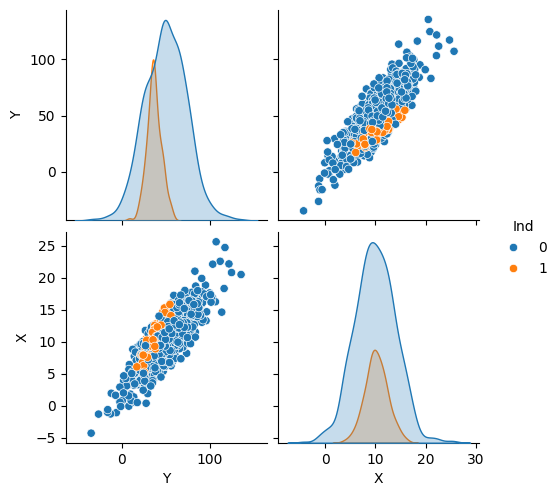

In [66]:
# Observamos graficamente el comportamiento de las variables 'X' y 'Y' enfoncandos o usando como pista la variable categórica 'Ind'
sns.pairplot(df, hue="Ind")

Text(0, 0.5, 'Valor tomado')

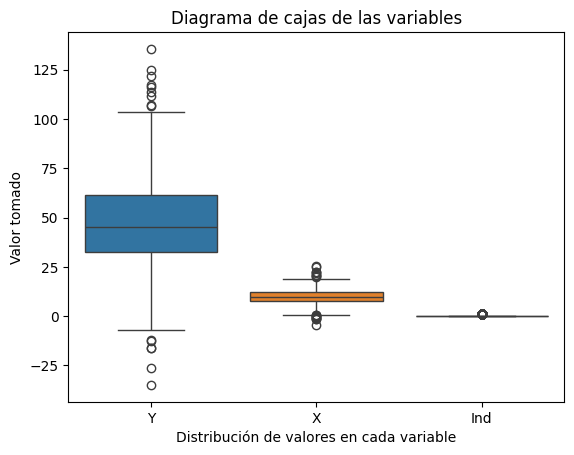

In [59]:
# Realizamos un diagrama de cajas para observar el comportamiento de los puntos de cada variable
sns.boxplot(df)
# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas de las variables")
plt.xlabel("Distribución de valores en cada variable")
plt.ylabel("Valor tomado")

Text(0, 0.5, 'Número de veces o cantidad para cada valor tomado')

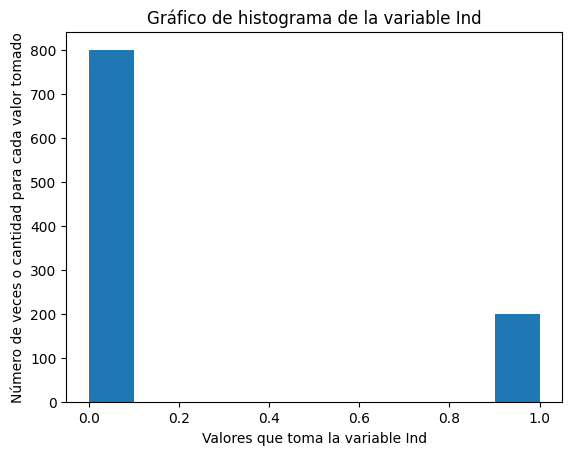

In [74]:
# Revisamos el histograma de la varaible categórica de forma individual
plt.hist(df['Ind'])

# Agregamos títulos al gráfico y ejes
plt.title("Gráfico de histograma de la variable Ind")
plt.xlabel("Valores que toma la variable Ind")
plt.ylabel("Número de veces o cantidad para cada valor tomado")

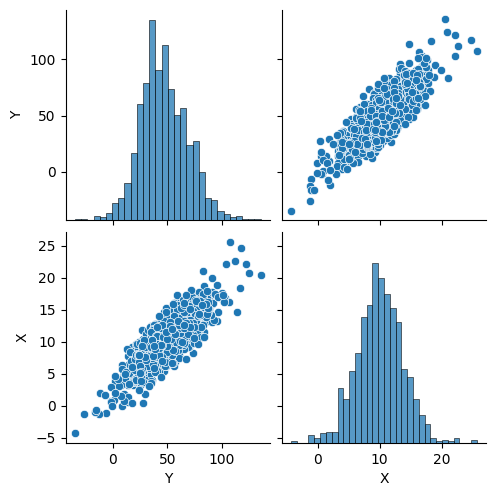

In [53]:
# Decidimos sacar la variable categorica "Ind" y solo analizar "X" y "Y"
sns.pairplot(df.drop("Ind", axis=1))

Text(0, 0.5, 'Número de veces o cantidad')

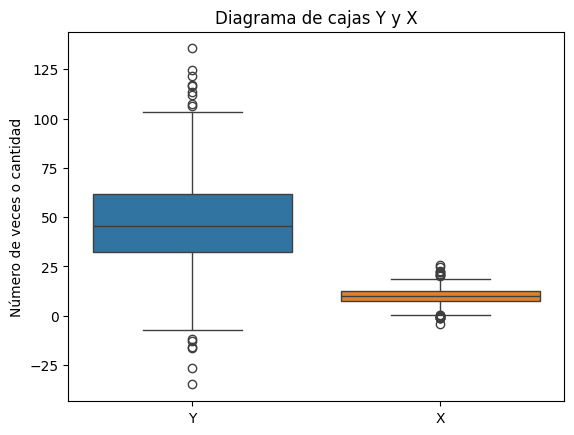

In [57]:
# De nuevo observamos solo las 2 variables que no son categóricas
sns.boxplot(df.drop("Ind", axis=1))

# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas Y y X")
plt.ylabel("Número de veces o cantidad")

Text(0.5, 1.0, 'Diagrama de cajas X vs Ind')

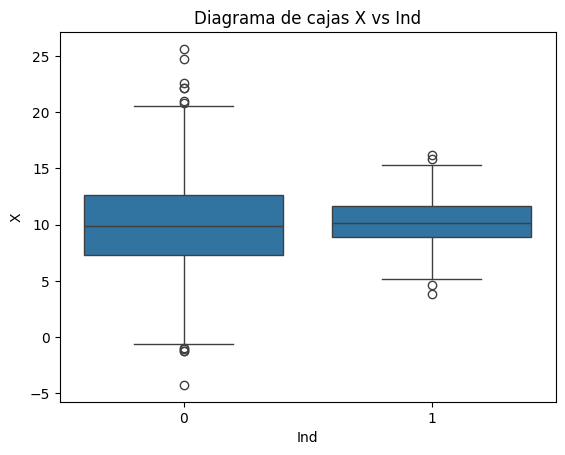

In [73]:
# De nuevo observamos solo las 2 variables cuantitativas vs la variable categórica Ind
# Graficamos 'X' vs 'Ind'
sns.boxplot(df.drop("Y", axis=1), x=df['Ind'], y=df['X'])

# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas X vs Ind")

Text(0.5, 1.0, 'Diagrama de cajas Y vs Ind')

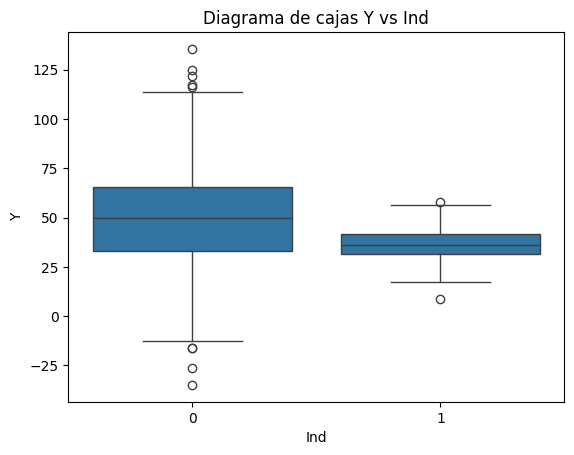

In [72]:
# Graficamos 'Y' vs 'Ind'
sns.boxplot(df.drop("X", axis=1), x=df['Ind'], y=df['Y'])

# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas Y vs Ind")

#### Hallazgos
- El conjunto de datos tiene 1000 filas y 3 columnas

- Sus encabezados o nombres de columnas tienen el mismo orden, primera letra mayuscula; además no tienen simbolos o espacios.

- Tenemos 2 columnas con datos tipo flotantes y 1 columna con datos enteros. Adicional de los 1000 registros no contamos con ningún dato nulo o faltante.

- Tenemos una variable categórica llamada "Ind", la cual toma valores de "0" o "1" que podría indicar un valor de SI o NO, género FEMENINO o MASCULINO; pero son solo conjeturas rápidas. Adicional un 80% (800 veces) de sus datos toman el valor '0' y el 20% (200 veces) el valor '1'.

- De acuerdo a los gráficos de dispersión podemos ver que hay correlacion entre 'X' y 'Y' indicando así su dependencia lineal. Y la concentración de sus datos están más cerca de la medía de cada una como se observa en el gráfico de cajas

- Ahora si tomamos en cuenta la distribución de la variable 'Ind' respecto de 'X' y 'Y' y su valor de correlación, no podemos afirmar que tengan dependencia lineal significativa, especialmente con 'Y', ya que su 80% de valores forman o dibujan una recta con una pendiente diferente al que realizan el otro 20% com ose muestra en la gráfica. Ahora con respecto a 'X' la situación varía un poco pues pareciera que es un desplazamiento de la misma, pero de nuevo consideramos que no es significativa.

¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

Consideramos que NO se puede generar un modelo de regresión lineal con la variable categórica (sin interación para la variable 'Y'. Debido que no tienen correlación y adicional gráficamente se intuye que no tienen correlaciones y podría generarse un falso positivo. Su relación no es lineal

Ahora hagamos el ejercicio de hacer el modelo y observar lo que obtenemos de toda forma para la parte académica:

In [15]:
# Creación del modelo sin interación de la variable categórica Ind  para la variable Y
Y_modelo = df["Y"] #Variable respuesta

X_modelo = df.drop("Y", axis=1) #variables explicativas
X_modelo = sm.add_constant(X_modelo) #Variable de constante que se agrega siempre de valores 1 para la elaboracion del modelo OLS, el intercepto
# X_modelo se puede resumir en 1 sola linea: X_modelo = sm.add_constant(df.drop(´Y´, axis=1))

modelo = sm.OLS(Y_modelo, X_modelo)
resultados = modelo.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          2.25e-308
Time:                        12:36:41   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.4

Prob (F-statistic):2.25e-308 < 0.05

Al cumplir esta condición númerica podemos concluir que el modelo nos sirve
apriori

#### Supuestos

In [16]:
# 0. Media cero: Usamos un one sample t test con media en 0 para verificar justamente que los residuales esten centrados en cero
# from scipy.stats import ttest_1samp # para mirar si el modelo está centrado en cero. Para el supuesto 0

ttest_1samp(resultados.resid, 0)

#Falta la conclusion de los resultados


TtestResult(statistic=-6.106157525987408e-14, pvalue=0.9999999999999514, df=999)

In [17]:
# 1. Normalidad: Usamos Jarque-Bera, si el p-value Prob(JB) es mayor a 0.05, no rechazo la hipotesis nula por lo tanto concluyo normalidad.
# H0: X ~ normal
# H1: X !~ normal

# Tenemos p-value Prob(JB) = 0.295
# Concluimos normalidad en el modelo resultados y está cumplido este supuesto

In [18]:
# 2. Independencia: Usamos Durbin-Watson, si el valor DW esta entre 1.5 y 2.5 decimos que hay independencia en los errores de lo contrario,
# los errores no serian independientes.

# Durbin-Watson = 1.997
# Concluimos que hay independiencia en los errores y está cumpliendo los supuestos.

In [19]:
# 3. Homocedasticidad: Usamos Breuschpagan test para el tema de homogeneidad de varianzas,
# Si el p_value asociado al multiplicador de lagranse es mayor a 0.05 concluimos homocedasticidad
# de lo contrario concluimos heterocedasticidad.

#Para calcular homocedasticidad
#from statsmodels.compat import lzip
#import statsmodels.stats.api as sms

names = ["lagrange-multiplier-statistic", "p-value", "f-value", "f-p-value"]
bp_test = sms.het_breuschpagan(resultados.resid, resultados.model.exog) # residuales y exogenos

lzip(names, bp_test)

# Concluimos homocedasticidad

[('lagrange-multiplier-statistic', 64.60486660135223),
 ('p-value', 9.359043491930456e-15),
 ('f-value', 34.42986268675474),
 ('f-p-value', 3.4758447737327506e-15)]

#### Interpretacion del modelo "modelo"


In [94]:
# R-squared = 0.759 = 75.9% - Adj. R-squared = 0.758 = 75.8%
# Estos dos valores nos indican en que porcentaje o valor la variable dependiente 'Y'
# puede ser predecida por las variables predictoras o independientes ('X', 'Ind'), en este caso un 75% de acierto

# beta_0 = const.coef = 0.7873 Este es el intercepto de la regresión.
# Esto quiere deicr que cuando todas las variables independientes ('X', 'Ind') son cero,
# se supone que el valor de la variable dependiente 'Y' sea más o menos 0.7873.

# beta_1 = X.coef = 4.9116
# Por cada unidad de aumento en la variable "X", suponiendo el resto de variables constantes,
# se espera que "Y" aumente 4.9116 unidades

# beta_2 = Ind.coef = -14.1796
# Por cada unidad de aumento en la variable "Ind", suponiendo el resto de variables constantes,
# se espera que "Y" aumente -14.1796 unidades




Text(0, 0.5, 'Variable Y')

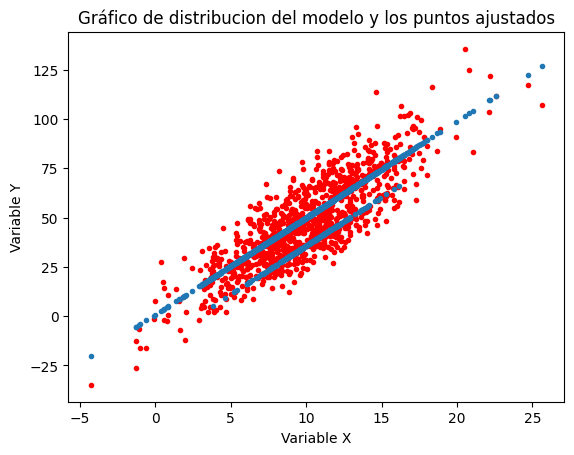

In [47]:
# Graficando el modelo respuesta

plt.plot(X_modelo.X, Y_modelo, '.', color="red")
plt.plot(X_modelo.X, resultados.fittedvalues, '.')

# Agragamos títulos al gráfico y ejes
plt.title("Gráfico de distribucion del modelo y los puntos ajustados")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

Como se evidencia en la gráfica lo ideal sería agregar interaciones entre las variables cuantitativas 'X' y 'Y' y la variable cualitativa 'Ind' para poder llegar a un modelo que se ajuste más a lo que buscamos y no obtener así 2 diferentes tipos de respuesta que acarrerían como dijimos anteriormente un falso positivo, una interpretacción errada al final. un modelo que no sirve.

Ahora iniciaremos la segunda parte de la pregunta:

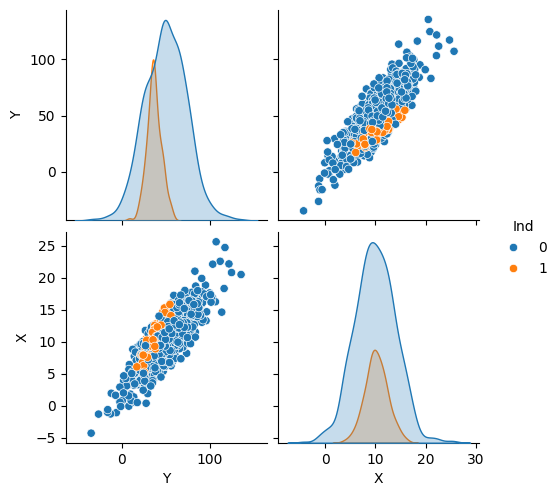

In [48]:
# Observamos graficamente el comportamiento de las variables 'X' y 'Y' enfoncandos o usando como pista la variable categórica 'Ind'
sns.pairplot(df, hue="Ind")

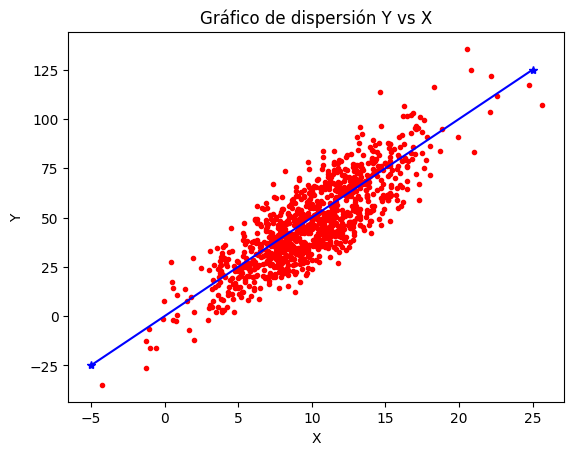

In [77]:
# Realizamos gráfico de dispersión de las variables Y vs X
plt.plot(df.X, df.Y, '.', color="red")

# Agragamos títulos al gráfico y ejes
plt.title("Gráfico de dispersión Y vs X")
plt.xlabel("X")
plt.ylabel("Y")

# Observamos que una recta podría desribir visulamente el gráfico de dispersión creado por las 2 variables.
plt.plot([-5, 25], [-25, 125], "*", color = "blue")
plt.plot([-5, 25], [-25, 125], color = "blue")

Consideramos que la evidencia muestral nos sugiere un cambio en la tasa media de cambio de Y, condicionado a incrementos en X

Respecto a si un modelo con interacciones de las variables predictora y la variable categórica sería más adecuado tenemos 2 perspectivas:
1. Para este caso espefíco, si! debido a que esta interación ayudaría adescrbir por completo o de una mejorar manera la relación entre las variables.

2. Para la creación de un modelo que nos permita evaluar otros conjuntos de datos para este mismo campo de acción si sería lo idonéo pues nos ahorraría tiempo en proceso como el EDA y demás.

Teniendo en cuenta estas 2 observaciones concluimos que lo idóneo con el fin de predecir el comportamiento de otros componentes o elementos de la muestra que desconocemos u otros conjuntos de datos futuros del mismo sistema o area de estudio es adecuado usar un modelo con interacciones.




In [79]:
#Construccion del modelo con interacciones
# Hacemos un dataframe df_int donde incluimos una interaccion en una variable X2
# la cual la defineremos como el valor multiplicado de 'X' por 'Ind' creando así su interacción

df_int = df.copy()
df_int["X2"] = df_int["X"]*df_int["Ind"]

df_int.head()

,Y,X,Ind,X2
0,66.199147,12.653765,0,0.000000
1,44.311301,8.204418,0,0.000000
2,48.390783,8.768596,0,0.000000
3,58.087413,16.169568,1,16.169568
4,60.708671,9.980310,0,0.000000


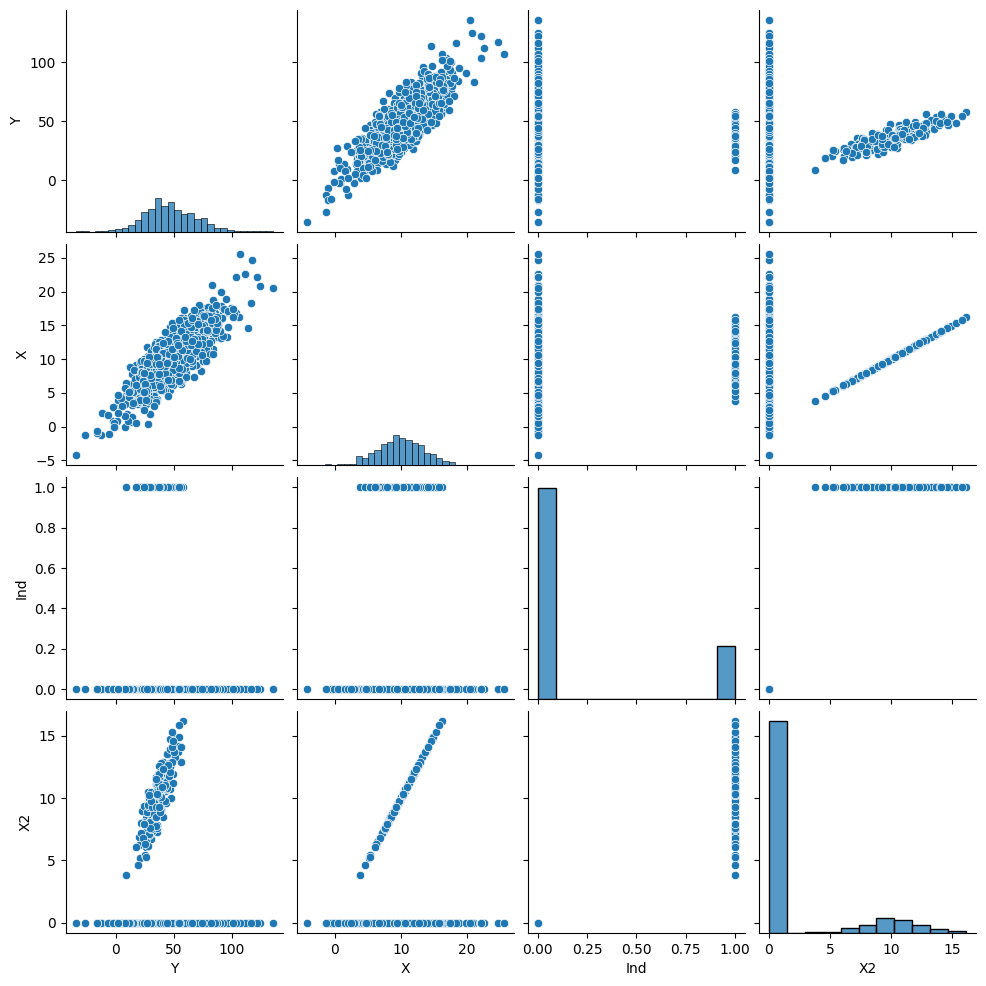

In [80]:
# Observamos graficamente el comportamiento de las variables
sns.pairplot(df_int)

In [81]:
#Miramos sus correlaciones
df_int.corr()

,Y,X,Ind,X2
Y,1.000000,0.832057,-0.237224,-0.196048
X,0.832057,1.000000,0.024069,0.086396
Ind,-0.237224,0.024069,1.000000,0.971261
X2,-0.196048,0.086396,0.971261,1.000000


In [82]:
# Modelo lineal con interaccion
Y_modelo2 = df_int["Y"]
X_modelo2 = sm.add_constant(df_int.drop("Y", axis = 1))

modelo2 = sm.OLS(Y_modelo2, X_modelo2)
resultados2 = modelo2.fit()

print(resultados2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          1.34e-312
Time:                        14:54:34   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4991      1.001     -0.498      0.6

#### Supuestos

In [84]:
# 0. Media cero: Usamos un one sample t test con media en 0 para verificar justamente que los residuales esten centrados en cero

from scipy.stats import ttest_1samp # para mirar si el modelo está centrado en cero. Para el supuesto 0

ttest_1samp(resultados2.resid, 0)

#Falta la conclusion de los resultados

TtestResult(statistic=-5.56737193353094e-14, pvalue=0.9999999999999556, df=999)

In [87]:
# 1. Normalidad: Usamos Jarque-Bera, si el p-value Prob(JB) es mayor a 0.05, no rechazo la hipotesis nula por lo tanto concluyo normalidad.
# H0: X ~ normal
# H1: X !~ normal

# Tenemos p-value Prob(JB) = 0.0902
# Concluimos normalidad en el modelo resultados y está cumplido este supuesto

In [89]:
# 2. Independencia: Usamos Durbin-Watson, si el valor DW esta entre 1.5 y 2.5 decimos que hay independencia en los errores de lo contrario,
# los errores no serian independientes.

# Durbin-Watson = 1.985
# Concluimos que hay independiencia en los errores y está cumpliendo los supuestos.

In [86]:
# 3. Homocedasticidad: Usamos Breuschpagan test para el tema de homogeneidad de varianzas,
# Si el p_value asociado al multiplicador de lagranse es mayor a 0.05 concluimos homocedasticidad
# de lo contrario concluimos heterocedasticidad.

# Para calcular homocedasticidad
# from statsmodels.compat import lzip
# import statsmodels.stats.api as sms

names2 = ["lagrange-multiplier-statistic", "p-value", "f-value", "f-p-value"]
bp_test = sms.het_breuschpagan(resultados2.resid, resultados2.model.exog) # residuales y exogenos

lzip(names, bp_test)

# Concluimos homocedasticidad

[('lagrange-multiplier-statistic', 83.04028836791721),
 ('p-value', 6.835236597869036e-18),
 ('f-value', 30.06607093901456),
 ('f-p-value', 1.3067597184142322e-18)]

#### Interpretacion del modelo "modelo2"

In [ ]:
beta_1 = 4.9116
# Por cada unidad de aumento en la variable "X", suponiendo el resto de variables constantes,
# se espera que "Y" aumente 4.9116 unidades

beta_2 = -14.1796
# Por cada unidad de aumento en la variable "Ind", suponiendo el resto de variables constantes,
# se espera que "Y" aumente -14.1796 unidades

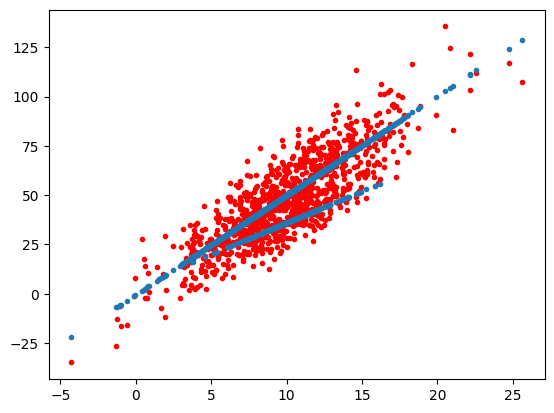

In [83]:
# Graficando el modelo respuesta

plt.plot(X_modelo2.X, Y_modelo2, '.', color="red")
plt.plot(X_modelo2.X, resultados2.fittedvalues, '.')

### 2) Considere el conjunto de datos “data2” del fichero data_exam1.xlsx

Realice un análisis exploratorio de datos, tanto univariante como bivariante ¿Qué puede decir acerca del comportamiento distribucional de cada variable? ¿Considera que la dispersión bi-variante da indicios para generar un modelo de regresión para Y? Justifique detalladamente.

De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior, proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modeloo: (εiiid∼ N(0, σ2)).

In [29]:
#Empezamos por leer el conjunto de datos "data2" del fichero data_exam1.xlsx
df2 = pd.read_excel("data_exam1.xlsx", sheet_name = 'data2')
df2

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573
...,...,...
995,10.283153,0.053585
996,-5.006186,0.000002
997,13.845597,0.073044
998,14.012956,0.085079


In [30]:
# Observamos la configuración de las variables de dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [31]:
# observamos los primero 5 datos (filas) del dataframe df
df2.head()

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


In [32]:
# Observamos los ultimos 5 datos (filas) del dataframe df
df2.tail()

,Y,X
995,10.283153,0.053585
996,-5.006186,0.000002
997,13.845597,0.073044
998,14.012956,0.085079
999,11.521064,0.108597


In [33]:
# Observamos los nombres de las columnas o headers del dataframe df
df2.columns

Index(['Y', 'X'], dtype='object')

In [34]:
# Observamos la descripcon analitica de los datos tabulares
df2.describe()

,Y,X
count,1000.000000,1.000000e+03
mean,9.445622,7.234805e-02
std,3.908189,9.753985e-02
min,-12.073239,1.343729e-08
25%,7.411486,8.450417e-03
50%,10.072134,3.655172e-02
75%,12.082546,9.992523e-02
max,17.838788,9.397465e-01


In [35]:
# Observando si hay algún dato nulo x2da vez
df2.isnull().any()

Y    False
X    False
dtype: bool

(array([733., 171.,  52.,  24.,  11.,   6.,   0.,   0.,   2.,   1.]),
 array([1.34372911e-08, 9.39746626e-02, 1.87949312e-01, 2.81923961e-01,
        3.75898610e-01, 4.69873259e-01, 5.63847908e-01, 6.57822558e-01,
        7.51797207e-01, 8.45771856e-01, 9.39746505e-01]),
 <BarContainer object of 10 artists>)

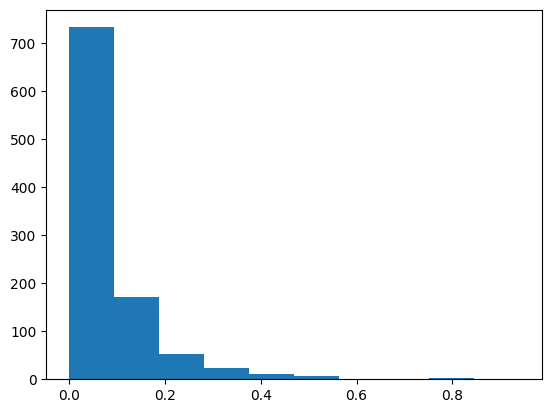

In [36]:
# analizamos el histograma y dispersión para cada una de las variables del dataframe iniciamos por X
# Histograma de la variable X del dataframe df2
plt.hist(df2.X)

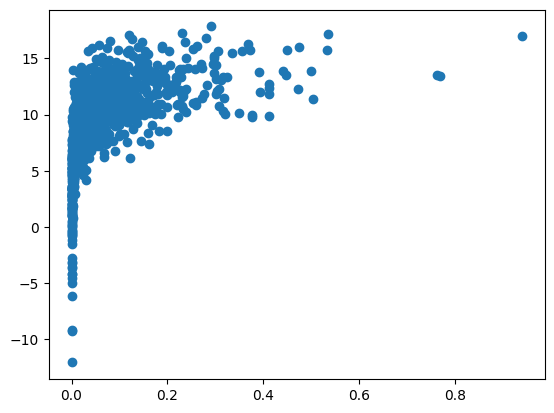

In [37]:
# Diagrama de dispersion de la variable X del dataframe df2
plt.scatter(df2.X, df2.Y)

(array([  3.,   1.,   8.,  10.,  42.,  80., 227., 351., 233.,  45.]),
 array([-12.07323856,  -9.08203587,  -6.09083318,  -3.09963048,
         -0.10842779,   2.8827749 ,   5.8739776 ,   8.86518029,
         11.85638298,  14.84758567,  17.83878837]),
 <BarContainer object of 10 artists>)

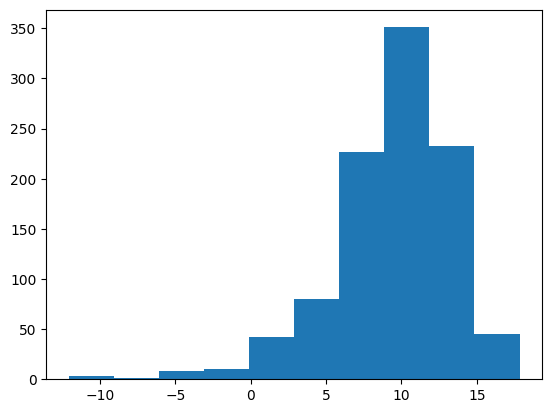

In [38]:
# Histograma de la variable X del dataframe df2
plt.hist(df2.Y)

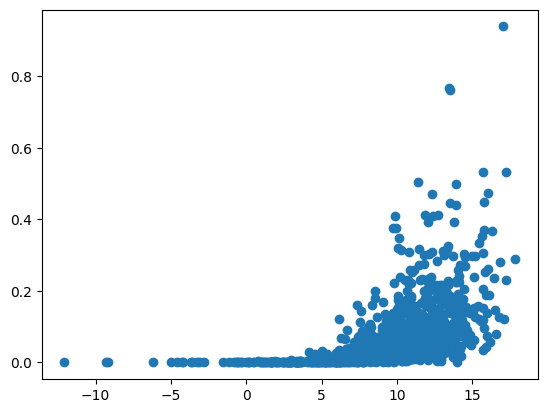

In [39]:
# Diagrama de dispersion de la variable X del dataframe df2
plt.scatter(df2.Y, df2.X)

array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X'>, <Axes: xlabel='X', ylabel='X'>]],
      dtype=object)

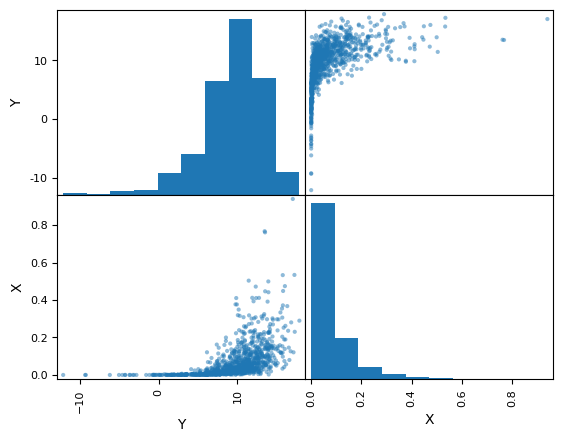

In [40]:
pd.plotting.scatter_matrix(df2)

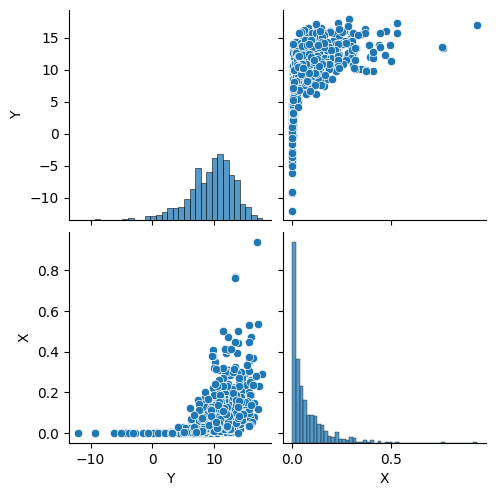

In [41]:
# es una gráfica igual a la interior con una mejor expresión gráfica
sns.pairplot(df2)

<Axes: >

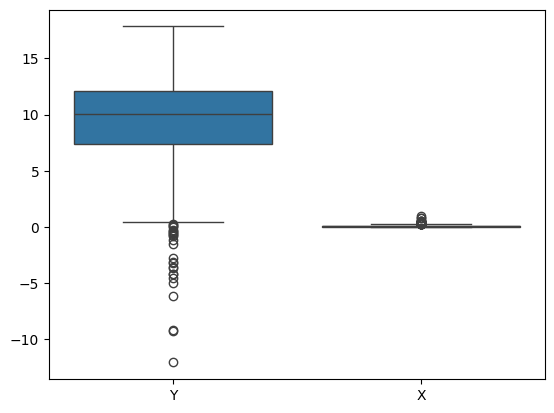

In [42]:
# Realizamos un diagrama de cajas para observar el comportamiento de los puntos de cada variable
sns.boxplot(df2)

#### Hallazgos
- El conjunto de datos tiene 1000 filas y 2 columnas

- Sus encabezados o nombres de columnas tienen el mismo orden, primera letra mayuscula; además no tienen simbolos o espacios.

- Tenemos 2 columnas con datos tipo flotantes. Adicional de los 1000 registros no contamos con ningún dato nulo o faltante.

- De acuerdo a los gráficos de dispersión podemos ver que hay no hay una correlacion clara entre 'X' y 'Y', la dispersiones de las variables son concentradas perpendicularmente opouestas o espejo la una de la otra. Con esto si tratamos de darle sentido no sería una relación lienal pues no obtendriamos un elipse, en cambio iríamos más hacía un circulo.

Realice un análisis exploratorio de datos, tanto univariante como bivariante ¿Qué puede decir acerca del comportamiento distribucional de cada variable? ¿Considera que la dispersión bi-variante da indicios para generar un modelo de regresión para Y? Justifique detalladamente.

Cada variable se distribuye de forma perpendicularmente opuesta

Esta dispersión bi-variante así como no está no muestra relación lineal significativa o importante para desarrollar un modelo de regresión para Y, puesto que si observamos su distribución en conjunto la figura o forma que podemos asemejar o crear mentalmente no es de forma eliptica.

Ahora bien haciendo alguna transformación podriamos acomodarla y de ahí si obtener una relación lineal que se asemejaría a la ya menciona forma de elipse.